## Data Viz's Scratch Paper/Brainstorming

In [255]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [256]:
# Functions
def load_data(filename):
    """Imports data files in the data folder given a string filename"""
    
    data = pd.read_csv('../data/' + filename)
    return data

def add_year(df, year):
    """Adds a new column to the dataset containing the given int year
    and the pandas dataframe name"""
    df['Year'] = [year] * df.shape[0]

def add_test(df, test):
    """Adds a binary variable for the test passed in"""
    df['test'] = [test]*df.shape[0]
    
def avg(values):
    total = sum(values)
    mean = total/len(values)
    return mean

def stdev(values):
    mean = avg(values)
    
    sum_of_diff_sq = 0
    for num in values:
        diff_sq = (num - mean)**2
        sum_of_diff_sq += diff_sq
    stdev = (sum_of_diff_sq/len(values))**(1/2)
    return stdev

def pct_transform(string):
    string = string.replace('%', '')
    number = float(string)/100
    return number



In [257]:
pwd

'C:\\Users\\snchu\\dsi\\Submissions\\Projects\\project_1-master\\code'

In [258]:
df = pd.read_csv('../data/final_df.csv', index_col=0)
df

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
0,Alabama,1.00,19.2,ACT,2017,NaN,NaN,32.806671,-86.79113,AL,act_contract
1,Alabama,1.00,19.1,ACT,2018,NaN,NaN,32.806671,-86.79113,AL,act_contract
2,Alabama,1.00,18.9,ACT,2019,NaN,NaN,32.806671,-86.79113,AL,act_contract
3,Alabama,0.05,1165.0,SAT,2017,593.0,572.0,32.806671,-86.79113,AL,act_contract
4,Alabama,0.06,1166.0,SAT,2018,595.0,571.0,32.806671,-86.79113,AL,act_contract
...,...,...,...,...,...,...,...,...,...,...,...
300,Wyoming,1.00,20.0,ACT,2018,NaN,NaN,42.755966,-107.30249,WY,act_contract
301,Wyoming,1.00,19.8,ACT,2019,NaN,NaN,42.755966,-107.30249,WY,act_contract
302,Wyoming,0.03,1230.0,SAT,2017,626.0,604.0,42.755966,-107.30249,WY,act_contract
303,Wyoming,0.03,1257.0,SAT,2018,633.0,625.0,42.755966,-107.30249,WY,act_contract


In [259]:
# Summary statistics
df.describe()

,participation,total,year,ebrw,math,latitude,longitude
count,305.000000,305.00000,305.000000,153.000000,153.000000,305.000000,305.000000
mean,0.534459,572.40623,2018.000000,564.535948,555.104575,39.466683,-93.392863
std,0.363232,554.04308,0.819178,46.301362,48.485370,6.029395,19.138006
min,0.020000,17.70000,2017.000000,480.000000,460.000000,21.094318,-157.498337
25%,0.200000,21.30000,2017.000000,531.000000,521.000000,35.630066,-105.311104
50%,0.550000,943.00000,2018.000000,554.000000,546.000000,39.849426,-89.616508
75%,0.960000,1099.00000,2019.000000,614.000000,596.000000,43.326618,-78.169968
max,1.000000,1298.00000,2019.000000,644.000000,655.000000,61.370716,-69.381927


In [260]:
# creating specific SAT and ACT dataframes
sat = df.query("test=='SAT'", engine='python')
act = df.query("test=='ACT'", engine='python')

In [261]:
# Use a dictionary comprehension to apply std dev function to each numeric column for each dataset
sat_stdev_dct = {col : stdev(sat[col]) for col in sat.columns if sat[col].dtype == int or sat[col].dtype == float}
sat_stdev_dct

{'participation': 0.36972997178997236,
 'total': 93.85442813319179,
 'ebrw': 46.14980241905188,
 'math': 48.32666125668321,
 'latitude': 6.009746237148944,
 'longitude': 19.098216044317283}

In [262]:
act_stdev_dct = {col : stdev(act[col]) for col in act.columns if act[col].dtype == int or act[col].dtype == float}
act_stdev_dct

{'participation': 0.3337930463384963,
 'total': 2.0893003996487187,
 'ebrw': nan,
 'math': nan,
 'latitude': 6.0293059418481985,
 'longitude': 19.11489733648284}

#### Investigating Trends
Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT and ACT?

In [415]:
df.query("test=='ACT'", engine='python').sort_values(by='participation', ascending=False)

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
0,Alabama,1.00,19.2,ACT,2017,NaN,NaN,32.806671,-86.791130,AL,act_contract
150,Missouri,1.00,20.0,ACT,2018,NaN,NaN,38.456085,-92.288368,MO,none
168,Nevada,1.00,17.7,ACT,2018,NaN,NaN,38.313515,-117.055374,NV,act_contract
167,Nevada,1.00,17.8,ACT,2017,NaN,NaN,38.313515,-117.055374,NV,act_contract
163,Nebraska,1.00,20.0,ACT,2019,NaN,NaN,41.125370,-98.268082,NE,act_contract
...,...,...,...,...,...,...,...,...,...,...,...
44,Delaware,0.13,24.1,ACT,2019,NaN,NaN,39.318523,-75.507141,DE,sat_contract
235,Rhode Island,0.12,24.7,ACT,2019,NaN,NaN,41.680893,-71.511780,RI,sat_contract
113,Maine,0.08,24.3,ACT,2017,NaN,NaN,44.693947,-69.381927,ME,sat_contract
114,Maine,0.07,24.0,ACT,2018,NaN,NaN,44.693947,-69.381927,ME,sat_contract


In [414]:
# SAT in 2017 participation
# st_2017 = sat.query("year==2017", engine='python').query("test=='SAT'", engine='python')
# st_2017[st_2017['participation'] == max(st_2017['participation'])]  # Max = Connecticut, Delaware, DC, and Michigan (100%)
# # st_2017[st_2017['participation'] == min(st_2017['participation'])]  # Min = Iowa, Mississippi, North Dakota (2%)

In [413]:
# SAT in 2018 participation
# st_2018 = sat.query("year==2018", engine='python').query("test=='SAT'", engine='python')
# st_2018[st_2018['participation'] == max(st_2018['participation'])]  # Max = Colorado, Delaware, DC, and Michigan (100%)
# st_2018[st_2018['participation'] == min(st_2018['participation'])] # Min = North Dakota (2%)

In [412]:
# SAT in 2019 participation 
# st_2019 = sat.query("year==2019", engine='python').query("test=='SAT'", engine='python')
# st_2019[st_2019['participation'] == max(st_2019['participation'])]  # Max = Colorado, Connecticut, Delaware, Florida, Idaho,
#                                                                      # Illinois, Michigan, Rhode Island (100%)
# st_2019[st_2019['participation'] == min(st_2019['participation'])]  # Min = North Dakota (2%) 

In [267]:
# ACT in 2017 participation 
at_2017 = act.query("year==2017", engine='python').query("test=='ACT'", engine='python')
at_max_2017 = at_2017[at_2017['participation'] == max(at_2017['participation'])]  # Max = Many...
at_max_2017  
# at_2017[at_2017['participation'] == min(at_2017['participation'])]  # Min = Maine (8%)

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
0,Alabama,1.0,19.2,ACT,2017,NaN,NaN,32.806671,-86.791130,AL,act_contract
18,Arkansas,1.0,19.4,ACT,2017,NaN,NaN,34.969704,-92.373123,AR,none
30,Colorado,1.0,20.8,ACT,2017,NaN,NaN,39.059811,-105.311104,CO,sat_contract
101,Kentucky,1.0,20.0,ACT,2017,NaN,NaN,37.668140,-84.670067,KY,act_contract
107,Louisiana,1.0,19.5,ACT,2017,NaN,NaN,31.169546,-91.867805,LA,act_contract
137,Minnesota,1.0,21.5,ACT,2017,NaN,NaN,45.694454,-93.900192,MN,none
143,Mississippi,1.0,18.6,ACT,2017,NaN,NaN,32.741646,-89.678696,MS,act_contract
149,Missouri,1.0,20.4,ACT,2017,NaN,NaN,38.456085,-92.288368,MO,none
155,Montana,1.0,20.3,ACT,2017,NaN,NaN,46.921925,-110.454353,MT,act_contract
167,Nevada,1.0,17.8,ACT,2017,NaN,NaN,38.313515,-117.055374,NV,act_contract


In [268]:
# ACT in 2018 participation
at_2018 = act.query("year==2018", engine='python').query("test=='ACT'", engine='python')
at_2018[at_2018['participation'] == max(at_2018['participation'])]  # Max = Many...
at_2018[at_2018['participation'] == min(at_2018['participation'])]  # Min = Maine (7%)

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
114,Maine,0.07,24.0,ACT,2018,NaN,NaN,44.693947,-69.381927,ME,sat_contract


In [269]:
# ACT in 2019 participation 
at_2019 = act.query("year==2019", engine='python').query("test=='ACT'", engine='python')
at_2019[at_2019['participation'] == max(at_2019['participation'])]  # Max = Many...
at_2019[at_2019['participation'] == min(at_2019['participation'])]  # Min = Maine (6%)

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
115,Maine,0.06,24.3,ACT,2019,NaN,NaN,44.693947,-69.381927,ME,sat_contract


Do any states with 100% participation on a given test have a rate change year-to-year? 

In [270]:
# In 2017 states with high participation in SAT = Connecticut, Delaware, DC, and Michigan
# high_sat_part = ['Connecticut','Delaware','District of Columbia', 'Michigan']
# sat_ct = sat[sat['state'].isin(high_sat_part)].query("state=='Connecticut'", engine='python')
# sat_de = sat[sat['state'].isin(high_sat_part)].query("state=='Delaware'", engine='python')
# sat_dc = sat[sat['state'].isin(high_sat_part)].query("state=='District of Columbia'", engine='python')
# sat_mi = sat[sat['state'].isin(high_sat_part)].query("state=='Michigan'", engine='python')

In [271]:
# plt.figure(figsize=(8,6))
# plt.plot(sat_ct['year'], sat_ct['participation'], c='blue', label='CT')
# plt.plot(sat_de['year'], sat_de['participation'], c='green', label='DE')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [272]:
# plt.figure(figsize=(8,6))
# plt.plot(sat_dc['year'], sat_dc['participation'], c='red', label='DC')
# plt.plot(sat_mi['year'], sat_mi['participation'], c='gold', label='MI')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [273]:
# In 2017 states with high participation in ACT = Many but here are a few: Arkansas, Missouri, Minnesota, Oklahoma,
# South Carolina, Tennessee, Wisconsin, Wyoming
high_act_part = list(at_max_2017['state']) 
act_ala = act[act['state'].isin(high_act_part)].query("state=='Alabama'", engine='python')
act_ark = act[act['state'].isin(high_act_part)].query("state=='Arkansas'", engine='python') 
act_col = act[act['state'].isin(high_act_part)].query("state=='Colorado'", engine='python')
act_ken = act[act['state'].isin(high_act_part)].query("state=='Kentucky'", engine='python')
act_lou = act[act['state'].isin(high_act_part)].query("state=='Louisiana'", engine='python')
act_min = act[act['state'].isin(high_act_part)].query("state=='Minnesota'", engine='python')
act_missi = act[act['state'].isin(high_act_part)].query("state=='Mississippi'", engine='python')
act_misso = act[act['state'].isin(high_act_part)].query("state=='Missouri'", engine='python')
act_mon = act[act['state'].isin(high_act_part)].query("state=='Montana'", engine='python')
act_nev = act[act['state'].isin(high_act_part)].query("state=='Nevada'", engine='python')
act_nc = act[act['state'].isin(high_act_part)].query("state=='North Carolina'", engine='python')
act_okl = act[act['state'].isin(high_act_part)].query("state=='Oklahoma'", engine='python')
act_sc = act[act['state'].isin(high_act_part)].query("state=='South Carolina'", engine='python')
act_ten = act[act['state'].isin(high_act_part)].query("state=='Tennessee'", engine='python')
act_uta = act[act['state'].isin(high_act_part)].query("state=='Utah'", engine='python')
act_wis = act[act['state'].isin(high_act_part)].query("state=='Wisconsin'", engine='python')
act_wyo = act[act['state'].isin(high_act_part)].query("state=='Wyoming'", engine='python')

##### Visualize the Data

In [411]:
# plt.figure(figsize=(8,6))
# plt.plot(act_ala['year'], act_ala['participation'], c='blue', label='Alabama')
# plt.plot(act_ark['year'], act_ark['participation'], c='green', label='Arkansas')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [409]:
# plt.figure(figsize=(8,6))
# plt.plot(act_lou['year'], act_lou['participation'], c='blue', label='Louisiana')
# plt.plot(act_ken['year'], act_ken['participation'], c='green', label='Kentucky')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

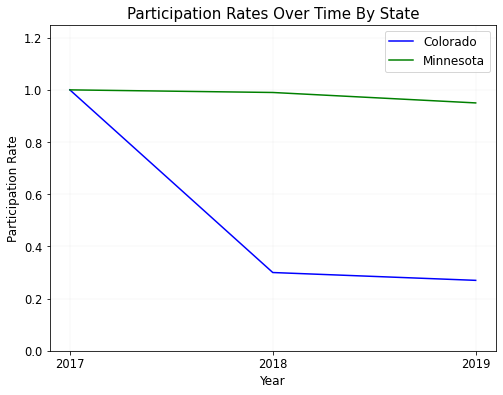

In [417]:
fig = plt.figure(figsize=(8,6))
plt.grid(True, linewidth = .3, linestyle = '-', c='black', alpha=0.1)
plt.plot(act_col['year'], act_col['participation'], c='blue', label='Colorado') 
plt.plot(act_min['year'], act_min['participation'], c='green', label='Minnesota')  # decreased a little

plt.title('Participation Rates Over Time By State', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.xticks(ticks=[2017, 2018, 2019], fontsize=11.5)
plt.ylabel('Participation Rate', fontsize=12)
plt.yticks(fontsize=11.5)
plt.legend(loc='upper right', fontsize=12)
plt.ylim(bottom=0, top=1.25);

fig.savefig('col-minn.jpg')

In [388]:
# plt.figure(figsize=(8,6))
# plt.plot(act_missi['year'], act_missi['participation'], c='blue', label='Mississippi') 
# plt.plot(act_ten['year'], act_ten['participation'], c='green', label='Tennessee')  # decreased
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [381]:
# plt.figure(figsize=(8,6))
# plt.plot(act_mon['year'], act_mon['participation'], c='blue', label='Montana')
# plt.plot(act_nev['year'], act_nev['participation'], c='green', label='Nevada')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [380]:
# plt.figure(figsize=(8,6))
# plt.plot(act_nc['year'], act_nc['participation'], c='blue', label='North Carolina')
# plt.plot(act_okl['year'], act_okl['participation'], c='green', label='Oklahoma')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

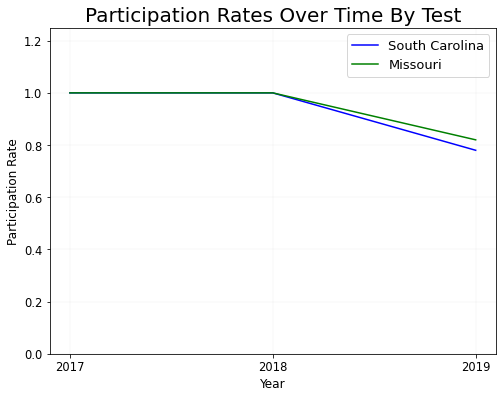

In [406]:
plt.figure(figsize=(8,6))
plt.grid(True, linewidth = .3, linestyle = '-', c='black', alpha=0.1)
plt.plot(act_sc['year'], act_sc['participation'], c='blue', label='South Carolina')  # decreased
plt.plot(act_misso['year'], act_misso['participation'], c='green', label='Missouri') # decreased

plt.title('Participation Rates Over Time By Test', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.xticks(ticks=[2017, 2018, 2019], fontsize=11.5)
plt.ylabel('Participation Rate', fontsize=12)
plt.yticks(fontsize=11.5)
plt.legend(loc='upper right', fontsize=13)
plt.ylim(bottom=0, top=1.25);

In [379]:
# plt.figure(figsize=(8,6))
# plt.plot(act_uta['year'], act_uta['participation'], c='blue', label='Utah')
# plt.plot(act_wis['year'], act_wis['participation'], c='green', label='Wisconsin')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [378]:
# plt.figure(figsize=(8,6))
# plt.plot(act_wyo['year'], act_wyo['participation'], c='blue', label='Wyoming')
# plt.legend(loc='upper right', fontsize=12)
# plt.ylim(bottom=0, top=1.5);

In [284]:
sat_year_agg = sat.groupby(by='year').mean()
sat_year_agg

,participation,total,ebrw,math,latitude,longitude
year,,,,,,
2017,0.398039,1126.098039,569.117647,556.882353,39.464823,-93.33938
2018,0.457451,1120.019608,563.686275,556.235294,39.464823,-93.33938
2019,0.490588,1113.078431,560.803922,552.196078,39.464823,-93.33938


In [285]:
act_year_agg = act.groupby(by='year').mean()
act_year_agg

,participation,total,ebrw,math,latitude,longitude
year,,,,,,
2017,0.652549,21.519608,NaN,NaN,39.464823,-93.339380
2018,0.623200,21.454000,NaN,NaN,39.476170,-93.665631
2019,0.586667,21.464706,NaN,NaN,39.464823,-93.339380


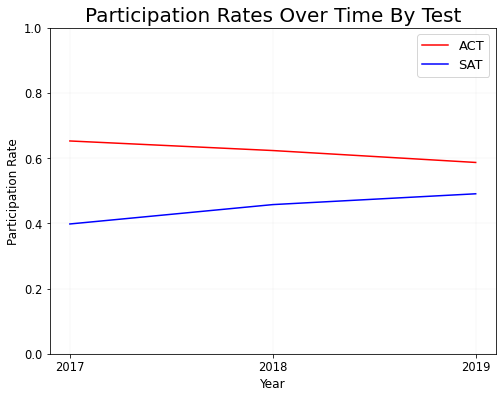

In [386]:
plt.figure(figsize=(8,6))
plt.grid(True, linewidth = .3, linestyle = '-', c='black', alpha=0.1)
plt.plot(act_year_agg.index, act_year_agg['participation'], c='red', label='ACT')
plt.plot(sat_year_agg.index, sat_year_agg['participation'], c='blue', label='SAT')
plt.title('Participation Rates Over Time By Test', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.xticks(ticks=[2017, 2018, 2019], fontsize=11.5)
plt.ylabel('Participation Rate', fontsize=12)
plt.yticks(fontsize=11.5)
plt.legend(loc='upper right', fontsize=13)
plt.ylim(bottom=0, top=1.0);

In [287]:
df.groupby(by='test').mean()

,participation,total,year,ebrw,math,latitude,longitude
test,,,,,,,
ACT,0.620789,21.479605,2018,NaN,NaN,39.468556,-93.446699
SAT,0.448693,1119.732026,2018,564.535948,555.104575,39.464823,-93.339380


In [288]:
df.groupby(by=['contract_test', 'test']).mean()

participation        total  year        ebrw        math  \
contract_test test                                                             
act_contract  ACT        0.983333    19.543590  2018         NaN         NaN   
              SAT        0.130769  1195.923077  2018  601.153846  594.692308   
either        ACT        0.960833    19.541667  2018         NaN         NaN   
              SAT        0.230833  1105.000000  2018  560.166667  544.666667   
none          ACT        0.500580    21.908696  2018         NaN         NaN   
              SAT        0.462464  1125.608696  2018  566.797101  558.681159   
sat_contract  ACT        0.310625    23.640625  2018         NaN         NaN   
              SAT        0.874848  1022.757576  2018  518.121212  504.636364   

                     latitude   longitude  
contract_test test                         
act_contract  ACT   37.859588 -101.896593  
              SAT   37.859588 -101.896593  
either        ACT   36.389716  -86.832796  
              SAT   36.389716  -86.832796  
none          ACT   39.994078  -94.622083  
              SAT   39.994078  -94.622083  
sat_contract  ACT   41.450891  -83.094182  
              SAT   41.373513  -82.910323

In [419]:
df.groupby(by=['year','contract_test', 'test']).mean().head(10)

participation        total        ebrw        math  \
year contract_test test                                                       
2017 act_contract  ACT        0.978462    19.707692         NaN         NaN   
                   SAT        0.130000  1199.846154  606.384615  593.384615   
     either        ACT        0.937500    19.975000         NaN         NaN   
                   SAT        0.185000  1122.000000  568.500000  553.000000   
     none          ACT        0.532174    21.960870         NaN         NaN   
                   SAT        0.433913  1122.608696  566.260870  556.217391   
     sat_contract  ACT        0.415455    23.300000         NaN         NaN   
                   SAT        0.717273  1047.727273  531.272727  516.545455   
2018 act_contract  ACT        0.990000    19.546154         NaN         NaN   
                   SAT        0.133077  1184.769231  592.846154  591.923077   

                          latitude   longitude  
year contract_test test                         
2017 act_contract  ACT   37.859588 -101.896593  
                   SAT   37.859588 -101.896593  
     either        ACT   36.389715  -86.832796  
                   SAT   36.389715  -86.832796  
     none          ACT   39.994078  -94.622083  
                   SAT   39.994078  -94.622083  
     sat_contract  ACT   41.373513  -82.910323  
                   SAT   41.373513  -82.910323  
2018 act_contract  ACT   37.859588 -101.896593  
                   SAT   37.859588 -101.896593

In [291]:
# df
# sat
# act

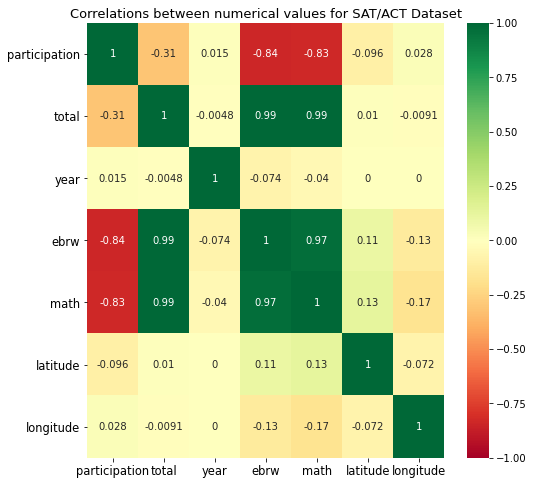

In [292]:
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot=True, center=0.00, vmin=-1, cmap='RdYlGn')
plt.title('Correlations between numerical values for SAT/ACT Dataset', fontsize=13)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5);

*Interpretation: The above image shows the numerical values from my combined SAT and ACT dataset. While some of the variables will not have meaningful correlations relationships there are two scenarios where observations can be made.  (1) There seems to be a high positive correlation between math and evidence-based reading and writing scores (ebrw).  (2) Other other hand, there seems to be a negative correlation between participation rates for the SAT, and the average math and ebrw score.*

In [293]:
act_17 = act[act['year'] == 2017]
act_18 = act[act['year'] == 2018]
act_19 = act[act['year'] == 2019]

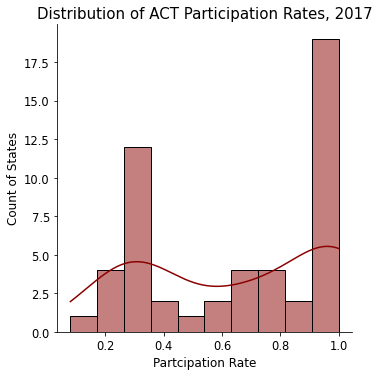

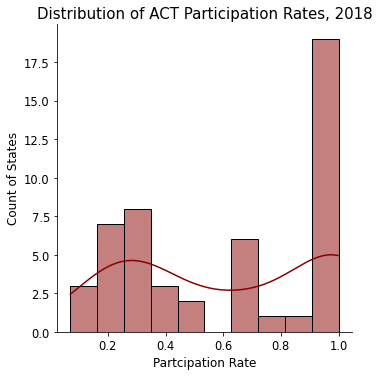

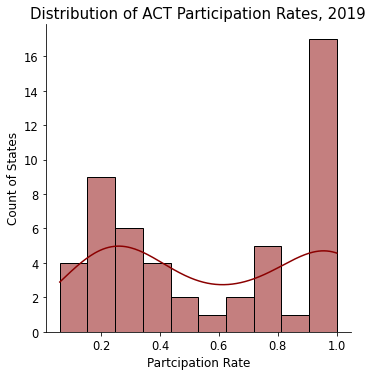

In [294]:
sns.displot(act_17['participation'], bins = 10, kde= True, color= 'darkred')
plt.title('Distribution of ACT Participation Rates, 2017', fontsize=15)
plt.xlabel('Partcipation Rate', fontsize=12)
plt.xticks(fontsize=11.5)
plt.ylabel('Count of States', fontsize=12)
plt.yticks(fontsize=11.5)

sns.displot(act_18['participation'], bins = 10, kde= True, color= 'darkred')
plt.title('Distribution of ACT Participation Rates, 2018', fontsize=15)
plt.xlabel('Partcipation Rate', fontsize=12)
plt.xticks(fontsize=11.5)
plt.ylabel('Count of States', fontsize=12)
plt.yticks(fontsize=11.5)

sns.displot(act_19['participation'], bins = 10, kde= True, color= 'darkred')
plt.title('Distribution of ACT Participation Rates, 2019', fontsize=15)
plt.xlabel('Partcipation Rate', fontsize=12)
plt.xticks(fontsize=11.5)
plt.ylabel('Count of States', fontsize=12)
plt.yticks(fontsize=11.5);

*Interpretation: The above images show the distribution of participation rates from the years 2017-2019. It can be observed that from year to year the distributions tend to be left-skewed.  A normal distribution is not observed here, and there are various reasons for this - one reason being that often times states will contract with the ACT company to offer high school juniors a one-time free ACT exam.  Therefore, the way states are distributed are not random, but rather affected by contracts with the ACT company.*

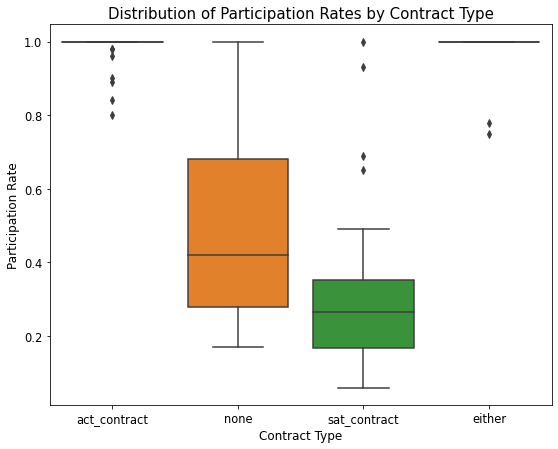

In [313]:
plt.figure(figsize=(9,7))
sns.boxplot(x='contract_test', y='participation', data=act)
plt.title('Distribution of Participation Rates by Contract Type', fontsize=15)
plt.xlabel('Contract Type', fontsize=12)
plt.xticks(fontsize=11.5)
plt.ylabel('Participation Rate', fontsize=12)
plt.yticks(fontsize=11.5);

*Interpretation: The above image shows the spread of ACT participation rates based on the contract type in a state.  These boxplots show that if a state has a contract with ACT to offer a free ACT test to high school juniors, the participation rates dramatically increased 60 or more percentage points.*

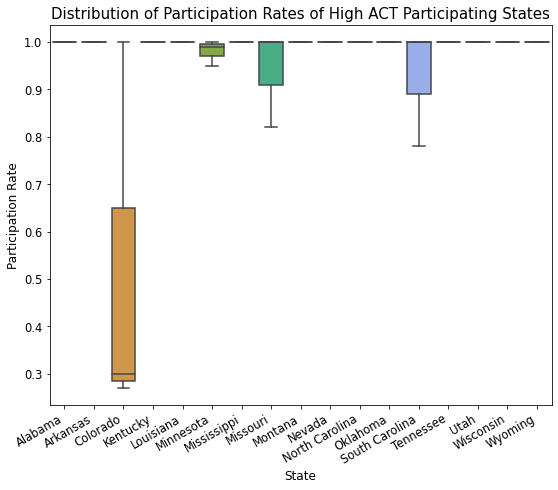

In [331]:
plt.figure(figsize=(9,7))
plot = sns.boxplot(x='state', y='participation', data=act[act['state'].isin(high_act_part)])
plot.set_xticklabels(high_act_part, fontsize=14, rotation=30, ha= 'right')
plt.title('Distribution of Participation Rates of High ACT Participating States', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.xticks(fontsize=11.5)
plt.ylabel('Participation Rate', fontsize=12)
plt.yticks(fontsize=11.5);

*Interpretation: The above image shows the states that historically have high participation rates with ACT. The boxplots show that most states have maintained their high participation rates except for 4 states, which on average, have decrease participation rates in the last 3 years.*

In [420]:
act

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
0,Alabama,1.00,19.2,ACT,2017,NaN,NaN,32.806671,-86.791130,AL,act_contract
1,Alabama,1.00,19.1,ACT,2018,NaN,NaN,32.806671,-86.791130,AL,act_contract
2,Alabama,1.00,18.9,ACT,2019,NaN,NaN,32.806671,-86.791130,AL,act_contract
6,Alaska,0.65,19.8,ACT,2017,NaN,NaN,61.370716,-152.404419,AK,none
7,Alaska,0.33,20.8,ACT,2018,NaN,NaN,61.370716,-152.404419,AK,none
...,...,...,...,...,...,...,...,...,...,...,...
294,Wisconsin,1.00,20.5,ACT,2018,NaN,NaN,44.268543,-89.616508,WI,act_contract
295,Wisconsin,1.00,20.3,ACT,2019,NaN,NaN,44.268543,-89.616508,WI,act_contract
299,Wyoming,1.00,20.2,ACT,2017,NaN,NaN,42.755966,-107.302490,WY,act_contract
300,Wyoming,1.00,20.0,ACT,2018,NaN,NaN,42.755966,-107.302490,WY,act_contract


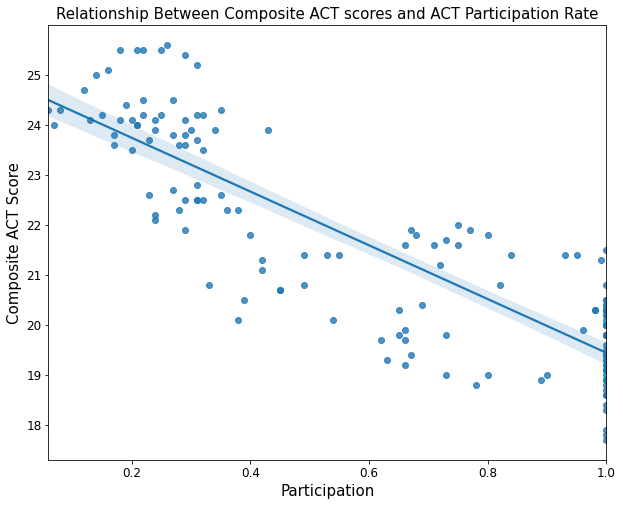

In [347]:
# sns.jointplot(x='participation', y='total', data=act, kind='reg')
plt.figure(figsize=(10,8))
sns.regplot(x='participation', y='total', data=act)
plt.title('Relationship Between Composite ACT scores and ACT Participation Rate', fontsize=15)
plt.xlabel('Participation Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Composite ACT Score', fontsize=15)
plt.yticks(fontsize=12);a

*Interpretation: The above image shows that as the participation rate of the ACT increases, the average composite score tends to decrease. There is a negative correlation between participation rates and composite ACT scores.*

In [352]:
import plotly 
import plotly.express as px 

In [349]:
act

,state,participation,total,test,year,ebrw,math,latitude,longitude,abbrev,contract_test
0,Alabama,1.00,19.2,ACT,2017,NaN,NaN,32.806671,-86.791130,AL,act_contract
1,Alabama,1.00,19.1,ACT,2018,NaN,NaN,32.806671,-86.791130,AL,act_contract
2,Alabama,1.00,18.9,ACT,2019,NaN,NaN,32.806671,-86.791130,AL,act_contract
6,Alaska,0.65,19.8,ACT,2017,NaN,NaN,61.370716,-152.404419,AK,none
7,Alaska,0.33,20.8,ACT,2018,NaN,NaN,61.370716,-152.404419,AK,none
...,...,...,...,...,...,...,...,...,...,...,...
294,Wisconsin,1.00,20.5,ACT,2018,NaN,NaN,44.268543,-89.616508,WI,act_contract
295,Wisconsin,1.00,20.3,ACT,2019,NaN,NaN,44.268543,-89.616508,WI,act_contract
299,Wyoming,1.00,20.2,ACT,2017,NaN,NaN,42.755966,-107.302490,WY,act_contract
300,Wyoming,1.00,20.0,ACT,2018,NaN,NaN,42.755966,-107.302490,WY,act_contract


In [421]:
# plt.figure(figsize=(20,20))
us_map = px.choropleth(act, locations='abbrev', locationmode="USA-states", color='participation', scope="usa",
                       color_continuous_scale = px.colors.sequential.RdBu_r, hover_name=act['state'], 
                       title='Average ACT Participation Rates by State (2017-2019)')
us_map.show()
us_map.savefig('../imgs/col-minn.jpg')

AttributeError: 'Figure' object has no attribute 'savefig'

In [365]:
us_map = px.choropleth(act_18, locations='abbrev', locationmode="USA-states", color='participation', scope="usa",
                       color_continuous_scale = px.colors.sequential.RdBu_r, hover_name=act_18['state'], 
                       title='ACT Participation Rates by State')
us_map.show()

In [366]:
us_map = px.choropleth(act_19, locations='abbrev', locationmode="USA-states", color='participation', scope="usa",
                       color_continuous_scale = px.colors.sequential.RdBu_r, hover_name=act_19['state'], 
                       title='ACT Participation Rates by State')
us_map.show()